In [5]:
from torchvision.models import resnet50, ResNet50_Weights
import torch.nn as nn

model = resnet50(weights=ResNet50_Weights.DEFAULT)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 4)
model = model.to('cuda:0')

In [9]:
import torch

checkpoint = torch.load('checkpoints/snapshot20.pt')
model.load_state_dict(checkpoint)
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [39]:
from os import listdir
from os.path import isfile, join
from torchvision import transforms

examples_imgs = [f for f in listdir('data/test') if isfile(join('data/test', f))][:24]
crop = transforms.RandomResizedCrop(224) 

imgs = []
for img_name in examples_imgs:
    img_path = os.path.join('data/test', img_name)
    img = read_image(img_path) / 255
    img = crop(img)
    imgs.append(img.to('cuda:0'))

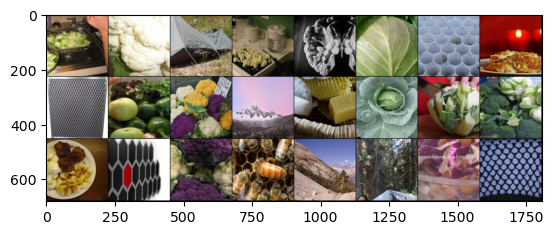

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision

def imshow(inp):
    """Display image for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    plt.pause(0.001)  

out = torchvision.utils.make_grid(imgs)
imshow(out)

In [52]:
names_dict = {
    0 : 'cauliflower',
    1 : 'mountain tent',
    2 : 'head cabbage',
    3 : 'honeycomb'
}

for img in imgs:
    output = model(img.unsqueeze(0))
    _, pred = torch.max(output, 1)
    print(names_dict.get(pred.item()))

cauliflower
cauliflower
mountain tent
cauliflower
honeycomb
head cabbage
honeycomb
cauliflower
honeycomb
head cabbage
cauliflower
mountain tent
cauliflower
head cabbage
cauliflower
cauliflower
cauliflower
honeycomb
cauliflower
honeycomb
mountain tent
mountain tent
head cabbage
honeycomb
